# Analysis of DB Repair Approaches

This notebook reproduces the results reported on the paper _"Consistent Data Fusion with Parker"_ by Bronselaer and Acosta. 

This notebook is structured as follows:
* [Load Input Data and Gold Standard](#data): Produces the data for _Table 1_ and _Figure 4_ in the paper. 
* [Load Results](#results): Processes the results of the approaches. 
* [Effectiveness of the Approaches](#effectiveness): Produces _Table 2_ in the paper. 
* [Violations of Edit Rules](#edit_rules): Producess _Table 3_ in the paper. 
* [Overall Effectiveness of the Approaches per Attribute](#effectiveness_attr): Produces _Table 4_ in the paper. 
* [Precision and Recall per Attribute ](#precision_recall_attr): Produces _Figure 5_ in the paper. 

This notebook is accompanied by two Python scripts `compute_metrics` and `edit_rules`: 
- `compute_metrics` with functions to process the repairs of the approaches and compute the performance metrics. 
- `edit_rules` counts the number of violations of the edit rules in the datasets before and after the repairs. 

In [1]:
import compute_metrics as cm
import edit_rules as er

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob
import os
import numpy as np

In [2]:
prefix = '../'

<a id='data'></a> 
## Load Input Data and Gold Standard

First, we load the datasetss and the corresponding gold standard. For each dataset, we create dataframes that are used in the analyses. For every dataset, we compute: 
- Number of sources describing each entity 
- Size of the dataset
- Distribution of errors in the dataset
- Total errors 
- Violations of edit rules

### Dataset: EudraCT

In [3]:
# Load data
eudract_gs = cm.load_gold_standard(prefix+'datasets/eudract_gold_standard.csv')
eudract_input = cm.load_dataset(prefix+'datasets/eudract.csv')

# Create dataframes
eudract_input_original = pd.DataFrame(eudract_input).transpose()
df_eudract_gs = pd.DataFrame(eudract_gs).transpose()
df_eudract_input = pd.DataFrame(eudract_input).transpose()
df_eudract_original = pd.DataFrame(eudract_input).transpose()

# Compare dataframes
df_eudract_input = df_eudract_input[list(df_eudract_gs.columns)]
df_aux = df_eudract_input[df_eudract_input.index.isin(df_eudract_gs.index)]
df_aux.sort_index(inplace=True)
df_eudract_gs.sort_index(inplace=True)
eudract_diff = df_eudract_gs.compare(df_aux, align_axis=0)

In [4]:
# Maximum number of sources 
print("Max number of sources:", max(df_eudract_input['eudract_number'].value_counts()))

Max number of sources: 44


In [5]:
# Size of the dataset
print("Size of the dataset:", df_eudract_input.shape)
print("Size of the gold standard:", df_eudract_gs.shape)
print("Percentage of the dataset represented in the gold standard:", (df_eudract_gs.shape[0]/df_eudract_input.shape[0])*100)

Size of the dataset: (86670, 9)
Size of the gold standard: (3133, 9)
Percentage of the dataset represented in the gold standard: 3.614860966885889


<AxesSubplot:ylabel='count'>

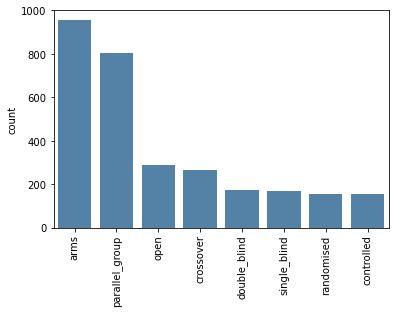

In [6]:
# Distribution of errors in the dataset
eudract_error_desc = pd.DataFrame( eudract_diff.count()/2, columns=["count"])
plt.xticks(rotation=90)
sns.barplot(data=eudract_error_desc.sort_values("count", ascending=False), x=eudract_error_desc.sort_values("count", ascending=False).index, y="count", color="steelblue")#, order=eudract_error_desc.index)

In [7]:
# Total errors
print("Total errors:", eudract_diff.count().sum()/2)

Total errors: 2962.0


### Dataset: Flight

In [8]:
# Load data
flight_gs = cm.load_gold_standard(prefix+'datasets/flight_gold_standard.csv')
flight_input = cm.load_dataset(prefix+'datasets/flight.csv', fillna="null")

# Create dataframes
df_flight_gs = pd.DataFrame(flight_gs).transpose()
df_flight_input = pd.DataFrame(flight_input).transpose()
df_flight_original= pd.DataFrame(flight_input).transpose()

# Compare dataframes
df_flight_input = df_flight_input[list(df_flight_gs.columns)]
df_aux2 = df_flight_input[df_flight_input.index.isin(df_flight_gs.index)]
df_aux2.sort_index(inplace=True)
df_flight_gs.sort_index(inplace=True)
flight_diff = df_flight_gs.compare(df_aux2, align_axis=0)

In [9]:
# Maximum number of sources 
print("Max number of sources:", max(df_flight_input['composed_key'].value_counts()))

Max number of sources: 51


In [10]:
# Size of the dataset
print("Size of the dataset:", df_flight_input.shape)
print("Size of the gold standard:", df_flight_gs.shape)
print("Percentage of the dataset represented in the gold standard:", (df_flight_gs.shape[0]/df_flight_input.shape[0])*100)

Size of the dataset: (776067, 5)
Size of the gold standard: (70951, 5)
Percentage of the dataset represented in the gold standard: 9.14238074805397


In [11]:
# Distribution of errors in the dataset
#rcParams['figure.figsize'] = 1.7,5
flight_error_desc = pd.DataFrame( flight_diff.count()/2, columns=["count"])
plt.xticks(rotation=90)
sns.barplot(data=flight_error_desc.sort_values("count", ascending=False), x=flight_error_desc.sort_values("count", ascending=False).index, y="count", color="steelblue", dodge=False)

<AxesSubplot:ylabel='count'>

In [12]:
# Total errors
print("Total errors:", flight_diff.count().sum()/2)

Total errors: 134778.0


### Dataset: Allergen

In [13]:
# Load data
allergen_gs = cm.load_gold_standard(prefix+'datasets/allergen_gold_standard.csv')
allergen_input = cm.load_dataset(prefix+'datasets/allergen.csv', fillna="null")

# Create dataframes
df_allergen_gs = pd.DataFrame(allergen_gs).transpose()
df_allergen_input = pd.DataFrame(allergen_input).transpose()
df_allergen_original = pd.DataFrame(allergen_input).transpose()

# Compare dataframes
df_allergen_input = df_allergen_input[list(df_allergen_gs.columns)]
df_aux3 = df_allergen_input[df_allergen_input.index.isin(df_allergen_gs.index)]
df_aux3.sort_index(inplace=True)
df_allergen_gs.sort_index(inplace=True)
allergen_diff = df_allergen_gs.compare(df_aux3, align_axis=0)

In [14]:
# Maximum number of sources 
print("Max number of sources:", max(df_allergen_input['code'].value_counts()))

Max number of sources: 2


In [15]:
# Size of the dataset
print("Size of the dataset:", df_allergen_input.shape)
print("Size of the gold standard:", df_allergen_gs.shape)
print("Percentage of the dataset represented in the gold standard:", (df_allergen_gs.shape[0]/df_allergen_input.shape[0])*100)

Size of the dataset: (1160, 22)
Size of the gold standard: (206, 22)
Percentage of the dataset represented in the gold standard: 17.75862068965517


In [16]:
# Distribution of errors in the dataset
#rcParams['figure.figsize'] = 6,5
allergen_error_desc = pd.DataFrame(allergen_diff.count()/2, columns=["count"])
plt.xticks(rotation=90)
#plt.subplots_adjust(bottom=0.6, left=0.4)
sns.barplot(data=allergen_error_desc.sort_values("count", ascending=False), x=allergen_error_desc.sort_values("count", ascending=False).index, y="count", color="steelblue")#, order=allergen_error_desc.index)#, dodge=False)

<AxesSubplot:ylabel='count'>

In [17]:
# Total errors
print("Total errors:", allergen_diff.count().sum()/2)

Total errors: 358.0


<a id='results'></a> 
## Load Results

### Load Holistic Results

Holistic results. Different results with the parameter `maxIterationNumber` set to `5` and `10`.  

In [18]:
results = glob.glob(os.path.join(prefix+"repairs/holistic/eudract", '*.csv'))
holistic_repairs_eudract = cm.load_results(results)

results = glob.glob(os.path.join(prefix+"repairs/holistic/flight", '*.csv'))
holistic_repairs_flight = cm.load_results(results)

results = glob.glob(os.path.join(prefix+"repairs/holistic/allergen", '*.csv'))
holistic_repairs_allergen = cm.load_results(results)

Loading ../repairs/holistic/eudract/holistic-10.csv
Loading ../repairs/holistic/eudract/holistic-5.csv
Loading ../repairs/holistic/flight/holistic-10.csv
Loading ../repairs/holistic/flight/holistic-5.csv
Loading ../repairs/holistic/allergen/holistic-10.csv
Loading ../repairs/holistic/allergen/holistic-5.csv


### Compute Holistic Metrics

In [19]:
holistic_repair_metrics = []

# Holistic: EudraCT metrics 
for exp in holistic_repairs_eudract:
    d = {}
    d = cm.get_repairs_metrics(eudract_gs, eudract_input, exp[1], keys=['eudract_number'])
    d['approach'] = exp[0]
    d['dataset'] = 'eudract'
    holistic_repair_metrics.append(d)

# Holistic: Flight metrics 
for exp in holistic_repairs_flight:
    d = {}
    d = cm.get_repairs_metrics(flight_gs, flight_input, exp[1], keys=['composed_key'])
    d['approach'] = exp[0]
    d['dataset'] = 'flight'
    holistic_repair_metrics.append(d)

# Holistic: Allergen metrics
for exp in holistic_repairs_allergen:
    d = {}
    d = cm.get_repairs_metrics(allergen_gs, allergen_input, exp[1], keys=['code'])
    d['approach'] = exp[0]
    d['dataset'] = 'allergen'
    holistic_repair_metrics.append(d)

df_holistic = pd.DataFrame(holistic_repair_metrics)

In [20]:
# Effectivenes of Holistic
df_holistic

tp     fp  relevant  precision    recall     approach   dataset
0    83     81      2962   0.506098  0.028022  holistic-10   eudract
1    83     81      2962   0.506098  0.028022   holistic-5   eudract
2  1060  86325    134778   0.012130  0.007865  holistic-10    flight
3  1060  86325    134778   0.012130  0.007865   holistic-5    flight
4    35    132       358   0.209581  0.097765  holistic-10  allergen
5    35    132       358   0.209581  0.097765   holistic-5  allergen

### Compute Holistic Macro Metrics

Since the previous results show that the `holistic` configurations (with different `maxIterationNumber` values) perform exactly the same, we take the results for configuration with`maxIterationNumber=5`. 

In [21]:
# Best results of Holistic in each dataset
holistic_eudract_best = holistic_repairs_eudract[1]
holistic_flight_best = holistic_repairs_flight[1]
holistic_allergen_best = holistic_repairs_allergen[1]

In [22]:
# Compute macro-precision, macro-recall, and macro-f1 
df_holistic_macro_eudract = cm.get_repairs_macro_metrics(eudract_gs, eudract_input, holistic_eudract_best[1], keys=['eudract_number'])
df_holistic_macro_flight = cm.get_repairs_macro_metrics(flight_gs, flight_input, holistic_flight_best[1], keys=['composed_key'])
df_holistic_macro_allergen = cm.get_repairs_macro_metrics(allergen_gs, allergen_input, holistic_allergen_best[1], keys=['code'])

In [23]:
# Dictionary with data and names of dataset 
holistic_repair_macro_metrics = [
    {'dataset': 'allergen',
     'approach': holistic_allergen_best[0],
     'macro_precision':df_holistic_macro_allergen['macro_precision'],
     'macro_recall': df_holistic_macro_allergen['macro_recall']},
    {'dataset': 'eudract',
     'approach': holistic_eudract_best[0],
     'macro_precision':df_holistic_macro_eudract['macro_precision'],
     'macro_recall':df_holistic_macro_eudract['macro_recall']},
     {'dataset': 'flight',
     'approach': holistic_flight_best[0],
     'macro_precision':df_holistic_macro_flight['macro_precision'],
     'macro_recall':df_holistic_macro_flight['macro_recall']}]

In [24]:
# Performance of HoloClean in the macro metrics
pd.DataFrame(holistic_repair_macro_metrics)

dataset     approach  macro_precision  macro_recall
0  allergen   holistic-5         0.185349      0.099726
1   eudract   holistic-5         0.413068      0.042449
2    flight  holistic-10         0.012943      0.007399

### Load HoloClean Results

HoloClean results: Clarification on the naming convention. 
* `holoclean-violations`: only the `ViolationDetector()` was used 
* `holoclean-null`: only the `NullDetector()` was used 
* `holoclean`: both the `ViolationDetector()` and `NullDetector()` were used 

In [25]:
results = glob.glob(os.path.join(prefix+"repairs/holoclean/eudract", '*.csv'))
holoclean_repairs_eudract = cm.load_results(results)

results = glob.glob(os.path.join(prefix+"repairs/holoclean/flight", '*.csv'))
holoclean_repairs_flight = cm.load_results(results)

results = glob.glob(os.path.join(prefix+"repairs/holoclean/allergen", '*.csv'))
holoclean_repairs_allergen = cm.load_results(results)

Loading ../repairs/holoclean/eudract/holoclean.csv
Loading ../repairs/holoclean/eudract/holoclean-null.csv
Loading ../repairs/holoclean/eudract/holoclean-violations.csv
Loading ../repairs/holoclean/flight/holoclean.csv
Loading ../repairs/holoclean/flight/holoclean-null.csv
Loading ../repairs/holoclean/flight/holoclean-violations.csv
Loading ../repairs/holoclean/allergen/holoclean.csv
Loading ../repairs/holoclean/allergen/holoclean-violations.csv


### Compute HoloClean Metrics

In [26]:
holoclean_repair_metrics = []

# HoloClean: EudraCT metrics
for exp in holoclean_repairs_eudract:
    d = {}
    d = cm.get_repairs_metrics(eudract_gs, eudract_input, exp[1], keys=['eudract_number'])
    d['approach'] = exp[0]
    d['dataset'] = 'eudract'
    holoclean_repair_metrics.append(d)

# HoloClean: Flight metrics 
for exp in holoclean_repairs_flight:
    d = {}
    d = cm.get_repairs_metrics(flight_gs, flight_input, exp[1], keys=['composed_key'])
    d['approach'] = exp[0]
    d['dataset'] = 'flight'
    holoclean_repair_metrics.append(d)

# HoloClean: Allergen metrics
for exp in holoclean_repairs_allergen:
    d = {}
    d = cm.get_repairs_metrics(allergen_gs, allergen_input, exp[1], keys=['code'])
    d['approach'] = exp[0]
    d['dataset'] = 'allergen'
    holoclean_repair_metrics.append(d)

df_holoclean = pd.DataFrame(holoclean_repair_metrics)

In [27]:
# Effectivenes of HoloClean
df_holoclean

tp     fp  relevant  precision    recall              approach   dataset
0    989    101      2962   0.907339  0.333896             holoclean   eudract
1    946    144      2962   0.867890  0.319379        holoclean-null   eudract
2    989    101      2962   0.907339  0.333896  holoclean-violations   eudract
3  58444  14148    134778   0.805102  0.433632             holoclean    flight
4  58619  13741    134778   0.810102  0.434930        holoclean-null    flight
5  58444  14148    134778   0.805102  0.433632  holoclean-violations    flight
6      2     34       358   0.055556  0.005587             holoclean  allergen
7      2     34       358   0.055556  0.005587  holoclean-violations  allergen

### Compute HoloClean Macro Metrics

Since the previous results show that the `holoclean` configuration (with both detectors) perform best, next we compute the macro metrics only for this configuration. 

In [28]:
# Best results of HoloClean in each dataset
holoclean_eudract_best = holoclean_repairs_eudract[0]
holoclean_flight_best = holoclean_repairs_flight[0]
holoclean_allergen_best = holoclean_repairs_allergen[0]

In [29]:
# Compute macro-precision, macro-recall, and macro-f1 
df_holoclean_macro_eudract = cm.get_repairs_macro_metrics(eudract_gs, eudract_input, holoclean_eudract_best[1], keys=['eudract_number'])
df_holoclean_macro_flight = cm.get_repairs_macro_metrics(flight_gs, flight_input, holoclean_flight_best[1], keys=['composed_key'])
df_holoclean_macro_allergen = cm.get_repairs_macro_metrics(allergen_gs, allergen_input, holoclean_allergen_best[1], keys=['code'])

In [30]:
# Dictionary with data and names of dataset 
holoclean_repair_macro_metrics = [
    {'dataset': 'allergen',
     'approach': holoclean_allergen_best[0],
     'macro_precision':df_holoclean_macro_allergen['macro_precision'],
     'macro_recall': df_holoclean_macro_allergen['macro_recall']},
    {'dataset': 'eudract',
     'approach': holoclean_eudract_best[0],
     'macro_precision':df_holoclean_macro_eudract['macro_precision'],
     'macro_recall':df_holoclean_macro_eudract['macro_recall']},
     {'dataset': 'flight',
     'approach': holoclean_flight_best[0],
     'macro_precision':df_holoclean_macro_flight['macro_precision'],
     'macro_recall':df_holoclean_macro_flight['macro_recall']}]

In [31]:
# Performance of HoloClean in the macro metrics
pd.DataFrame(holoclean_repair_macro_metrics)

dataset   approach  macro_precision  macro_recall
0  allergen  holoclean         0.048571      0.008149
1   eudract  holoclean         0.907828      0.421213
2    flight  holoclean         0.734252      0.519249

### Load Parker Results

In [32]:
results = glob.glob(os.path.join(prefix+"repairs/parker/eudract", '*.csv'))
parker_repairs_eudract = cm.load_results(results, sep=';')

results = glob.glob(os.path.join(prefix+"repairs/parker/flight", '*.csv'))
parker_repairs_flight = cm.load_results(results, sep=';')

results = glob.glob(os.path.join(prefix+"repairs/parker/allergen", '*.csv'))
parker_repairs_allergen = cm.load_results(results, sep=';')

Loading ../repairs/parker/eudract/parker-ncf.csv
Loading ../repairs/parker/eudract/parker-ncr.csv
Loading ../repairs/parker/eudract/parker-fpf-star.csv
Loading ../repairs/parker/eudract/parker-fcf.csv
Loading ../repairs/parker/eudract/parker-fcf-star.csv
Loading ../repairs/parker/eudract/parker-fcr.csv
Loading ../repairs/parker/eudract/parker-fer.csv
Loading ../repairs/parker/eudract/parker-fef.csv
Loading ../repairs/parker/flight/parker-ncr.csv
Loading ../repairs/parker/flight/parker-fcr-star.csv
Loading ../repairs/parker/flight/parker-fcr.csv
Loading ../repairs/parker/flight/parker-fer-star.csv
Loading ../repairs/parker/flight/parker-fer.csv
Loading ../repairs/parker/allergen/parker-ncf.csv
Loading ../repairs/parker/allergen/parker-ncr.csv
Loading ../repairs/parker/allergen/parker-fcr-star.csv
Loading ../repairs/parker/allergen/parker-fcf.csv
Loading ../repairs/parker/allergen/parker-fcf-star.csv
Loading ../repairs/parker/allergen/parker-fcr.csv
Loading ../repairs/parker/allergen/par

### Compute Parker Metrics

In [33]:
parker_repair_metrics = []

# Parker: EudraCT metrics
for exp in parker_repairs_eudract:
    #print(exp)
    d = cm.get_repairs_metrics(eudract_gs, eudract_input, exp[1], keys=['eudract_number'])
    d['approach'] = exp[0]
    d['dataset'] = 'eudract'
    parker_repair_metrics.append(d)

# Parker: Flight metrics
for exp in parker_repairs_flight:
    d = cm.get_repairs_metrics(flight_gs, flight_input, exp[1], keys=['composed_key'])
    d['approach'] = exp[0]
    d['dataset'] = 'flight'
    parker_repair_metrics.append(d)
    
# Parker: Allergen metrics
for exp in parker_repairs_allergen:
    d = cm.get_repairs_metrics(allergen_gs, allergen_input, exp[1], keys=['code'])
    d['approach'] = exp[0]
    d['dataset'] = 'allergen'
    parker_repair_metrics.append(d)

df_parker = pd.DataFrame(parker_repair_metrics) 

In [34]:
# Effectiveness of Parker
df_parker

tp     fp  relevant  precision    recall         approach   dataset
0     1222    719      2962   0.629572  0.412559       parker-ncf   eudract
1     1176    769      2962   0.604627  0.397029       parker-ncr   eudract
2     1398    524      2962   0.727367  0.471978  parker-fpf-star   eudract
3     1849    205      2962   0.900195  0.624240       parker-fcf   eudract
4     1683    239      2962   0.875650  0.568197  parker-fcf-star   eudract
5     1614    432      2962   0.788856  0.544902       parker-fcr   eudract
6     1635    419      2962   0.796008  0.551992       parker-fer   eudract
7     1912    150      2962   0.927255  0.645510       parker-fef   eudract
8    65564  84988    134778   0.435491  0.486459       parker-ncr    flight
9    90088  39121    134778   0.697227  0.668418  parker-fcr-star    flight
10   89719  39669    134778   0.693411  0.665680       parker-fcr    flight
11  106195  28210    134778   0.790112  0.787925  parker-fer-star    flight
12  109291  24625    134778   0.816116  0.810896       parker-fer    flight
13       2      2       358   0.500000  0.005587       parker-ncf  allergen
14       2      2       358   0.500000  0.005587       parker-ncr  allergen
15      67    100       358   0.401198  0.187151  parker-fcr-star  allergen
16      40    127       358   0.239521  0.111732       parker-fcf  allergen
17      36    131       358   0.215569  0.100559  parker-fcf-star  allergen
18      73     94       358   0.437126  0.203911       parker-fcr  allergen
19      75     92       358   0.449102  0.209497       parker-fer  allergen
20      34    133       358   0.203593  0.094972       parker-fef  allergen
21     110     58       358   0.654762  0.307263       parker-fpf  allergen

### Compute Parker Macro Metrics

Next, we compute the macro metrics only for the best configurations of Parker in each dataset:
- EudraCT: parker-fef (configuration 7)
- Flight: parker-fer (configuration 4)
- Allergen: parker-fpf (configuration 8)

In [35]:
# Best results of Parker in each dataset
parker_eudract_best = parker_repairs_eudract[7]
parker_flight_best = parker_repairs_flight[4]
parker_allergen_best = parker_repairs_allergen[8]

In [36]:
df_parker_macro_eudract = cm.get_repairs_macro_metrics(eudract_gs, eudract_input, parker_eudract_best[1], keys=['eudract_number'])
df_parker_macro_flight = cm.get_repairs_macro_metrics(flight_gs, flight_input, parker_flight_best[1], keys=['composed_key'])
df_parker_macro_allergen = cm.get_repairs_macro_metrics(allergen_gs, allergen_input, parker_allergen_best[1], keys=['code'])

In [37]:
parker_repair_macro_metrics = [
    {'dataset': 'allergen',
     'approach': parker_allergen_best[0],
     'macro_precision': df_parker_macro_allergen['macro_precision'],
     'macro_recall': df_parker_macro_allergen['macro_recall']},
    {'dataset': 'eudract',
     'approach': parker_eudract_best[0],
     'macro_precision': df_parker_macro_eudract['macro_precision'],
     'macro_recall': df_parker_macro_eudract['macro_recall']},
     {'dataset': 'flight',
     'approach': parker_flight_best[0],
     'macro_precision': df_parker_macro_flight['macro_precision'],
     'macro_recall': df_parker_macro_flight['macro_recall']}]

In [38]:
# Performance of Parker in the macro metrics
pd.DataFrame(parker_repair_macro_metrics)

dataset    approach  macro_precision  macro_recall
0  allergen  parker-fpf         0.652821      0.306230
1   eudract  parker-fef         0.920054      0.694831
2    flight  parker-fer         0.847998      0.848646

## Raha+Baran Results

### Load Raha+Baran Repairs

Raha+Baran can only be executed over the subset of the dataset for which correct data is available. Therefore, we need to first load the input data and gold standard used for this approach. 

In [39]:
# EudraCT: input and gold standard used for Raha+Baran
eudract_baran_input = cm.load_dataset(prefix+'datasets/eudract_baran.csv')
eudract_baran_gs = cm.load_gold_standard(prefix+'datasets/eudract_gold_standard_baran.csv')

In [40]:
# Allergen: input and gold standard used for Raha+Baran
allergen_baran_input = cm.load_dataset(prefix+'datasets/allergen_baran.csv')
allergen_baran_gs = cm.load_gold_standard(prefix+'datasets/allergen_gold_standard_baran.csv')

Next, since Raha+Baran produces different results depending on the (randomly) sampled tuples, we execute Raha+Baran 10 times for each dataset. Therefore, we load these results using the function `load_baran_results`. This function also loads the ID of the tuples that were used for sampling in each run. 

In [41]:
baran_repairs_eudract = cm.load_baran_results(prefix+'repairs/raha_baran/eudract/raha_baran_eudract', 10)
baran_repairs_allergen = cm.load_baran_results(prefix+'repairs/raha_baran/allergen/raha_baran_allergen', 10)

### Compute Baran Metrics

Now we use the function `compute_baran_metrics` to compute the average performance among all the runs for every dataset. This function computes precision and recall, and also the macro-scores. 

In [42]:
# Raha+Baran: EudraCT metrics and macro metrics
baran_metrics_eudract, baran_macro_metrics_eudract = cm.compute_baran_metrics(eudract_baran_gs, eudract_baran_input, baran_repairs_eudract, ['eudract_number'], 10)
baran_metrics_eudract["dataset"]= "eudract"
baran_metrics_eudract["approach"]= "raha+baran"

# Raha+Baran: Allergen metrics and macro metrics
baran_metrics_allergen, baran_macro_metrics_allergen = cm.compute_baran_metrics(allergen_baran_gs, allergen_baran_input, baran_repairs_allergen, ['code'], 10)
baran_metrics_allergen["dataset"]= "allergen"
baran_metrics_allergen["approach"]= "raha+baran"

baran_repair_metrics = [baran_metrics_allergen, baran_metrics_eudract]
df_raha_baran = pd.DataFrame(baran_repair_metrics) 

In [43]:
df_raha_baran

precision    recall   dataset    approach
0   0.509053  0.423420  allergen  raha+baran
1   0.869018  0.695877   eudract  raha+baran

### Compute Raha+Baran Macro Metrics

In [44]:
baran_repair_macro_metrics = [
    {'dataset': 'allergen',
     'approach': 'raha+baran',
     'macro_precision':baran_macro_metrics_allergen['macro_precision'],
     'macro_recall':baran_macro_metrics_allergen['macro_recall']},
    {'dataset': 'eudract',
     'approach': 'raha+baran',
     'macro_precision':baran_macro_metrics_eudract['macro_precision'],
     'macro_recall':baran_macro_metrics_eudract['macro_recall']}]

In [45]:
pd.DataFrame(baran_repair_macro_metrics)

dataset    approach  macro_precision  macro_recall
0  allergen  raha+baran         0.693511      0.399729
1   eudract  raha+baran         0.889897      0.679517

<a id='effectiveness'></a> 
## Effectiveness of the Approaches

The results computed for each approach before are now combined into a single dataframe `df_repairs`. We also compute the F1-score using precision and recall. 

In [46]:
# Combine all results and compute F1-scores
df_repairs = pd.DataFrame(holistic_repair_metrics + holoclean_repair_metrics + parker_repair_metrics + baran_repair_metrics)
df_repairs["f1-score"] = (2.0*df_repairs["precision"]*df_repairs["recall"])/(df_repairs["precision"]+df_repairs["recall"])

Next, we prepare the dataframe for presentation to compare all the approaches. 

In [47]:
# Prepare table for presentation
df_repairs = df_repairs[["f1-score", "precision", "recall", "approach", "dataset"]]
df_all = df_repairs.melt(id_vars=['dataset','approach'])
df_all.pivot(index=["dataset", "variable"], columns="approach").T.round(2)

dataset                    allergen                   eudract            \
variable                   f1-score precision recall f1-score precision   
      approach                                                            
value holistic-10              0.13      0.21   0.10     0.05      0.51   
      holistic-5               0.13      0.21   0.10     0.05      0.51   
      holoclean                0.01      0.06   0.01     0.49      0.91   
      holoclean-null            NaN       NaN    NaN     0.47      0.87   
      holoclean-violations     0.01      0.06   0.01     0.49      0.91   
      parker-fcf               0.15      0.24   0.11     0.74      0.90   
      parker-fcf-star          0.14      0.22   0.10     0.69      0.88   
      parker-fcr               0.28      0.44   0.20     0.64      0.79   
      parker-fcr-star          0.26      0.40   0.19      NaN       NaN   
      parker-fef               0.13      0.20   0.09     0.76      0.93   
      parker-fer               0.29      0.45   0.21     0.65      0.80   
      parker-fer-star           NaN       NaN    NaN      NaN       NaN   
      parker-fpf               0.42      0.65   0.31      NaN       NaN   
      parker-fpf-star           NaN       NaN    NaN     0.57      0.73   
      parker-ncf               0.01      0.50   0.01     0.50      0.63   
      parker-ncr               0.01      0.50   0.01     0.48      0.60   
      raha+baran               0.46      0.51   0.42     0.77      0.87   

dataset                             flight                   
variable                   recall f1-score precision recall  
      approach                                               
value holistic-10            0.03     0.01      0.01   0.01  
      holistic-5             0.03     0.01      0.01   0.01  
      holoclean              0.33     0.56      0.81   0.43  
      holoclean-null         0.32     0.57      0.81   0.43  
      holoclean-violations   0.33     0.56      0.81   0.43  
      parker-fcf             0.62      NaN       NaN    NaN  
      parker-fcf-star        0.57      NaN       NaN    NaN  
      parker-fcr             0.54     0.68      0.69   0.67  
      parker-fcr-star         NaN     0.68      0.70   0.67  
      parker-fef             0.65      NaN       NaN    NaN  
      parker-fer             0.55     0.81      0.82   0.81  
      parker-fer-star         NaN     0.79      0.79   0.79  
      parker-fpf              NaN      NaN       NaN    NaN  
      parker-fpf-star        0.47      NaN       NaN    NaN  
      parker-ncf             0.41      NaN       NaN    NaN  
      parker-ncr             0.40     0.46      0.44   0.49  
      raha+baran             0.70      NaN       NaN    NaN

<a id='edit_rules'></a> 
## Violations of Edit Rules

We look into the edit rules that are violated in the dataset as well as after the repairs computed with the different approaches.  

Here, we look into two cases: 
- Violations in the entire dataset. Here we report on the violations in the original data and after the repairs with the best configurations of HoloClean and Parker.   
- Violations in the subset of the dataset for which an entry exists in the gold standard. In this case, we can additionally report on the performane of Raha+Baran. 

For Raha+Baran, we count the number of violations after the repairs in each run, and then compute the average.  

### Violations in Allergens

In [48]:
# Violations in the entire dataset
x1 = er.allergen_rules(df_allergen_original, 'allergen ', 'data (dataset)')
x2 = er.allergen_rules(pd.DataFrame(holoclean_allergen_best[1]).transpose(), 'allergen ', 'holoclean (dataset)')
x3 = er.allergen_rules(pd.DataFrame(parker_allergen_best[1]).transpose(), 'allergen ', 'parker (dataset)') 
x4 = er.allergen_rules(pd.DataFrame(holistic_allergen_best[1]).transpose(), 'allergen ', 'holistic (dataset)') 

Violations computed data (dataset) allergen 
Violations computed holoclean (dataset) allergen 
Violations computed parker (dataset) allergen 
Violations computed holistic (dataset) allergen 


In [49]:
# Violations in the subset of the data for which exists an entry in the gold standard
ba = []
for x in baran_repairs_allergen:
    ba.append(er.allergen_rules(pd.DataFrame(x[0]).transpose(), 'allergen ', 'raha+baran (subset)'))    
x5 = pd.DataFrame(pd.concat(ba).mean()).transpose()
x5.index= ['raha+baran (subset)']        

x6 = er.allergen_rules(df_allergen_original[df_allergen_original.index.isin(df_allergen_gs.index)], 'allergen ', 'subset')
x7 = er.allergen_rules(pd.DataFrame(holoclean_allergen_best[1]).transpose()[pd.DataFrame(holoclean_allergen_best[1]).transpose().index.isin(df_allergen_gs.index)], 'allergen ', 'holoclean (subset)')
x8 = er.allergen_rules(pd.DataFrame(parker_allergen_best[1]).transpose()[pd.DataFrame(parker_allergen_best[1]).transpose().index.isin(df_allergen_gs.index)], 'allergen ', 'parker (subset)')
x9 = er.allergen_rules(pd.DataFrame(holistic_allergen_best[1]).transpose()[pd.DataFrame(holistic_allergen_best[1]).transpose().index.isin(df_allergen_gs.index)], 'allergen ', 'holistic (subset)')

Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed raha+baran (subset) allergen 
Violations computed subset allergen 
Violations computed holoclean (subset) allergen 
Violations computed parker (subset) allergen 
Violations computed holistic (subset) allergen 


In [50]:
allergen_violations = pd.concat([x1,x4,x2,x3,x6,x9,x7,x8,x5]).transpose()

In [51]:
# Overview of violations for the Allergen dataset
allergen_violations
# Total violations in the Allergen dataset
allergen_violations.loc['Total'] = allergen_violations.sum()
allergen_violations

data (dataset)  holistic (dataset)  holoclean (dataset)  \
allergen E1             0.0                 0.0                  0.0   
allergen E2             0.0                 0.0                  0.0   
allergen E3            10.0                 0.0                  1.0   
allergen E4             0.0                 0.0                  0.0   
allergen E5             0.0                 0.0                  0.0   
Total                  10.0                 0.0                  1.0   

             parker (dataset)  subset  holistic (subset)  holoclean (subset)  \
allergen E1               0.0     0.0                0.0                 0.0   
allergen E2               0.0     0.0                0.0                 0.0   
allergen E3               0.0     3.0                0.0                 0.0   
allergen E4               0.0     0.0                0.0                 0.0   
allergen E5               0.0     0.0                0.0                 0.0   
Total                     0.0     3.0                0.0                 0.0   

             parker (subset)  raha+baran (subset)  
allergen E1              0.0                  0.0  
allergen E2              0.0                  0.0  
allergen E3              0.0                  2.4  
allergen E4              0.0                  0.0  
allergen E5              0.0                  0.0  
Total                    0.0                  2.4

### Violations in EudraCT

In [52]:
# Violations in the entire dataset
y1 = er.eudract_rules(df_eudract_original, 'eudract ', 'data (dataset)')
y2 = er.eudract_rules(pd.DataFrame(holoclean_eudract_best[1]).transpose(), 'eudract ', 'holoclean (dataset)')
y3 = er.eudract_rules(pd.DataFrame(parker_eudract_best[1]).transpose(), 'eudract ', 'parker (dataset)')    
y4 = er.eudract_rules(pd.DataFrame(holistic_eudract_best[1]).transpose(), 'eudract ', 'holistic (dataset)')    

Violations computed data (dataset) eudract 
Violations computed holoclean (dataset) eudract 
Violations computed parker (dataset) eudract 
Violations computed holistic (dataset) eudract 


In [53]:
# Violations in the subset of the data for which exists an entry in the gold standard
y5 = er.eudract_rules(df_eudract_original[df_eudract_original.index.isin(df_eudract_gs.index)], 'eudract ', 'subset')
y6 = er.eudract_rules(pd.DataFrame(holoclean_eudract_best[1]).transpose()[pd.DataFrame(holoclean_eudract_best[1]).transpose().index.isin(df_eudract_gs.index)], 'eudract ', 'holoclean (subset)')
y7 = er.eudract_rules(pd.DataFrame(parker_eudract_best[1]).transpose()[pd.DataFrame(parker_eudract_best[1]).transpose().index.isin(df_eudract_gs.index)], 'eudract ', 'parker (subset)')
y8 = er.eudract_rules(pd.DataFrame(holistic_eudract_best[1]).transpose()[pd.DataFrame(holistic_eudract_best[1]).transpose().index.isin(df_eudract_gs.index)], 'eudract ', 'holistic (subset)')

ba = []
for x in baran_repairs_eudract:
    ba.append(er.eudract_rules(pd.DataFrame(x[0]).transpose(), 'eudract ', 'raha+baran (subset)'))    
y9 = pd.DataFrame(pd.concat(ba).mean()).transpose()
y9.index= ['raha+baran (subset)']

Violations computed subset eudract 
Violations computed holoclean (subset) eudract 
Violations computed parker (subset) eudract 
Violations computed holistic (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 
Violations computed raha+baran (subset) eudract 


In [54]:
# Overview of violations for the EudraCT dataset
eudract_violations = pd.concat([y1,y4,y2,y3,y5,y8,y6,y9,y7]).transpose()
# Total violations in the EudraCT dataset
eudract_violations.loc['Total'] = eudract_violations.sum()
eudract_violations

data (dataset)  holistic (dataset)  holoclean (dataset)  \
eudract E1           881.0               873.0                895.0   
eudract E2           164.0               151.0                167.0   
eudract E3          7034.0              7102.0               7953.0   
eudract E4            57.0                67.0                 65.0   
eudract E5           890.0               869.0                896.0   
eudract E6           211.0               201.0                217.0   
eudract E7           165.0               170.0                190.0   
eudract E8           230.0               227.0                230.0   
eudract E9           146.0               139.0                146.0   
Total               9778.0              9799.0              10759.0   

            parker (dataset)  subset  holistic (subset)  holoclean (subset)  \
eudract E1               0.0    12.0               10.0                12.0   
eudract E2               0.0     0.0                0.0                 0.0   
eudract E3               0.0   151.0              156.0               192.0   
eudract E4               0.0     0.0                4.0                 0.0   
eudract E5               0.0    47.0               45.0                47.0   
eudract E6               0.0     5.0                9.0                 5.0   
eudract E7               0.0     5.0                3.0                 7.0   
eudract E8               0.0     2.0                4.0                 2.0   
eudract E9               0.0     7.0                6.0                 7.0   
Total                    0.0   229.0              237.0               272.0   

            raha+baran (subset)  parker (subset)  
eudract E1                 12.6              0.0  
eudract E2                  0.0              0.0  
eudract E3                180.9              0.0  
eudract E4                  4.5              0.0  
eudract E5                 28.8              0.0  
eudract E6                  0.0              0.0  
eudract E7                 16.7              0.0  
eudract E8                  2.5              0.0  
eudract E9                  8.9              0.0  
Total                     254.9              0.0

### Violations in Flight

In [69]:
# Violations in the entire dataset
z1 = er.flight_rules(df_flight_original, 'flight ', 'data (dataset)')
z2 = er.flight_rules(pd.DataFrame(holoclean_flight_best[1]).transpose(), 'flight ', 'holoclean (dataset)')
z3 = er.flight_rules(pd.DataFrame(parker_flight_best[1]).transpose(), 'flight ', 'parker (dataset)')  
z4 = er.flight_rules(pd.DataFrame(holistic_flight_best[1]).transpose(), 'flight ', 'holistic (dataset)')  

Violations computed data (dataset) flight 
Violations computed holoclean (dataset) flight 
Violations computed parker (dataset) flight 
Violations computed holistic (dataset) flight 


In [70]:
# Violations in the subset of the data for which exists an entry in the gold standard
z5 = er.flight_rules(df_flight_original[df_flight_original.index.isin(df_flight_gs.index)], 'flight ', 'subset')
z6 = er.flight_rules(pd.DataFrame(holoclean_flight_best[1]).transpose()[pd.DataFrame(holoclean_flight_best[1]).transpose().index.isin(df_flight_gs.index)], 'flight ', 'holoclean (subset)')
z7 = er.flight_rules(pd.DataFrame(parker_flight_best[1]).transpose()[pd.DataFrame(parker_flight_best[1]).transpose().index.isin(df_flight_gs.index)], 'flight ', 'parker (subset)')                  
z8 = er.flight_rules(pd.DataFrame(holistic_flight_best[1]).transpose()[pd.DataFrame(holistic_flight_best[1]).transpose().index.isin(df_flight_gs.index)], 'flight ', 'holistic (subset)')                  

Violations computed subset flight 
Violations computed holoclean (subset) flight 
Violations computed parker (subset) flight 
Violations computed holistic (subset) flight 


In [71]:
# Overview of violations for the Flight dataset
flight_violations = pd.concat([z1,z4,z2,z3,z5,z8,z6,z7]).transpose()
# Total violations in the Flight dataset
flight_violations.loc['Total'] = flight_violations.sum()
flight_violations

data (dataset)  holistic (dataset)  holoclean (dataset)  \
flight E1            9327               59641                21375   
flight E2           10055               15983                10640   
Total               19382               75624                32015   

           parker (dataset)  subset  holistic (subset)  holoclean (subset)  \
flight E1                 0     799               5967                1861   
flight E2                 0    1273               1748                1367   
Total                     0    2072               7715                3228   

           parker (subset)  
flight E1                0  
flight E2                0  
Total                    0

### All Violations of Edit Rules

In [72]:
pd.concat([allergen_violations, eudract_violations, flight_violations])

data (dataset)  holistic (dataset)  holoclean (dataset)  \
allergen E1             0.0                 0.0                  0.0   
allergen E2             0.0                 0.0                  0.0   
allergen E3            10.0                 0.0                  1.0   
allergen E4             0.0                 0.0                  0.0   
allergen E5             0.0                 0.0                  0.0   
Total                  10.0                 0.0                  1.0   
eudract E1            881.0               873.0                895.0   
eudract E2            164.0               151.0                167.0   
eudract E3           7034.0              7102.0               7953.0   
eudract E4             57.0                67.0                 65.0   
eudract E5            890.0               869.0                896.0   
eudract E6            211.0               201.0                217.0   
eudract E7            165.0               170.0                190.0   
eudract E8            230.0               227.0                230.0   
eudract E9            146.0               139.0                146.0   
Total                9778.0              9799.0              10759.0   
flight E1            9327.0             59641.0              21375.0   
flight E2           10055.0             15983.0              10640.0   
Total               19382.0             75624.0              32015.0   

             parker (dataset)  subset  holistic (subset)  holoclean (subset)  \
allergen E1               0.0     0.0                0.0                 0.0   
allergen E2               0.0     0.0                0.0                 0.0   
allergen E3               0.0     3.0                0.0                 0.0   
allergen E4               0.0     0.0                0.0                 0.0   
allergen E5               0.0     0.0                0.0                 0.0   
Total                     0.0     3.0                0.0                 0.0   
eudract E1                0.0    12.0               10.0                12.0   
eudract E2                0.0     0.0                0.0                 0.0   
eudract E3                0.0   151.0              156.0               192.0   
eudract E4                0.0     0.0                4.0                 0.0   
eudract E5                0.0    47.0               45.0                47.0   
eudract E6                0.0     5.0                9.0                 5.0   
eudract E7                0.0     5.0                3.0                 7.0   
eudract E8                0.0     2.0                4.0                 2.0   
eudract E9                0.0     7.0                6.0                 7.0   
Total                     0.0   229.0              237.0               272.0   
flight E1                 0.0   799.0             5967.0              1861.0   
flight E2                 0.0  1273.0             1748.0              1367.0   
Total                     0.0  2072.0             7715.0              3228.0   

             parker (subset)  raha+baran (subset)  
allergen E1              0.0                  0.0  
allergen E2              0.0                  0.0  
allergen E3              0.0                  2.4  
allergen E4              0.0                  0.0  
allergen E5              0.0                  0.0  
Total                    0.0                  2.4  
eudract E1               0.0                 12.6  
eudract E2               0.0                  0.0  
eudract E3               0.0                180.9  
eudract E4               0.0                  4.5  
eudract E5               0.0                 28.8  
eudract E6               0.0                  0.0  
eudract E7               0.0                 16.7  
eudract E8               0.0                  2.5  
eudract E9               0.0                  8.9  
Total                    0.0                254.9  
flight E1                0.0                  NaN  
flight E2                0.0       

<a id='effectiveness_attr'></a> 
## Overall Effectiveness of the Approaches per Attribute

We now compare the average effectiveness of the best configuration of each approach per attribute using the macro metrics. We also compute the Macro F1-score. 

In [73]:
# Combine all results and compute macro F1-scores
df_repairs_macro = pd.DataFrame(holistic_repair_macro_metrics + holoclean_repair_macro_metrics + parker_repair_macro_metrics + baran_repair_macro_metrics)
df_repairs_macro["macro_f1-score"] = (2.0*df_repairs_macro["macro_precision"]*df_repairs_macro["macro_recall"])/(df_repairs_macro["macro_precision"]+df_repairs_macro["macro_recall"])
df_repairs_macro = df_repairs_macro[["macro_f1-score", "macro_precision", "macro_recall", "approach", "dataset"]]

Next, we prepare the dataframe for presentation to compare all the approaches. 

In [74]:
# Preprare dataframe for presentation
df_all_macro = df_repairs_macro.melt(id_vars=['dataset','approach'])
df_all_macro.pivot(index=["dataset", "variable"], columns="approach").T.round(2)

dataset                 allergen                                     eudract  \
variable          macro_f1-score macro_precision macro_recall macro_f1-score   
      approach                                                                 
value holistic-10            NaN             NaN          NaN            NaN   
      holistic-5            0.13            0.19         0.10           0.08   
      holoclean             0.01            0.05         0.01           0.58   
      parker-fef             NaN             NaN          NaN           0.79   
      parker-fer             NaN             NaN          NaN            NaN   
      parker-fpf            0.42            0.65         0.31            NaN   
      raha+baran            0.51            0.69         0.40           0.77   

dataset                                                flight                  \
variable          macro_precision macro_recall macro_f1-score macro_precision   
      approach                                                                  
value holistic-10             NaN          NaN           0.01            0.01   
      holistic-5             0.41         0.04            NaN             NaN   
      holoclean              0.91         0.42           0.61            0.73   
      parker-fef             0.92         0.69            NaN             NaN   
      parker-fer              NaN          NaN           0.85            0.85   
      parker-fpf              NaN          NaN            NaN             NaN   
      raha+baran             0.89         0.68            NaN             NaN   

dataset                         
variable          macro_recall  
      approach                  
value holistic-10         0.01  
      holistic-5           NaN  
      holoclean           0.52  
      parker-fef           NaN  
      parker-fer          0.85  
      parker-fpf           NaN  
      raha+baran           NaN

Lastly, we report on the precision and recall achieved by the approaches in each of the attributes of the datasets. This provides insights into which attributes are more challenging to repair. 

### EudraCT: Effectiveness per Attribute

In [75]:
# Preparation of the dataframes for plotting
df1 = pd.DataFrame(df_parker_macro_eudract['metrics']).transpose()[['precision', 'recall']]
df1.reset_index(level=0, inplace=True)
df1['approach'] = 'Parker (Best)'

df2 = pd.DataFrame(df_holoclean_macro_eudract['metrics']).transpose()[['precision', 'recall']]
df2.reset_index(level=0, inplace=True)
df2['approach'] = 'HoloClean'

df3 = pd.DataFrame(baran_macro_metrics_eudract['metrics']).transpose()[['precision', 'recall']]
df3.reset_index(level=0, inplace=True)
df3['approach'] = 'Raha+Baran'

df4 = pd.DataFrame(df_holistic_macro_eudract['metrics']).transpose()[['precision', 'recall']]
df4.reset_index(level=0, inplace=True)
df4['approach'] = 'Holistic'

df_macro_eudract = pd.concat([df1, df4, df2, df3])
df_macro_eudract

index  precision    recall       approach
0  parallel_group   0.829412  0.176030  Parker (Best)
1      controlled   0.825000  0.215686  Parker (Best)
2    single_blind   1.000000  0.923077  Parker (Best)
3            open   0.943709  0.982759  Parker (Best)
4    double_blind   0.993243  0.840000  Parker (Best)
5       crossover   0.911628  0.734082  Parker (Best)
6            arms   0.924107  0.868835  Parker (Best)
7      randomised   0.933333  0.818182  Parker (Best)
0  parallel_group   0.457143  0.019975       Holistic
1      controlled   0.645161  0.130719       Holistic
2    single_blind   0.000000  0.000000       Holistic
3            open   0.589744  0.079310       Holistic
4    double_blind   0.375000  0.017143       Holistic
5       crossover   0.437500  0.052434       Holistic
6            arms   0.200000  0.001049       Holistic
7      randomised   0.600000  0.038961       Holistic
0  parallel_group   0.818182  0.089888      HoloClean
1      controlled   1.000000  0.006536      HoloClean
2    single_blind   1.000000  0.893491      HoloClean
3            open   0.633929  0.244828      HoloClean
4    double_blind   1.000000  0.474286      HoloClean
5       crossover   0.962025  0.569288      HoloClean
6            arms   0.922872  0.364113      HoloClean
7      randomised   0.925620  0.727273      HoloClean
0  parallel_group   0.824287  0.598457     Raha+Baran
1      controlled   0.895971  0.415474     Raha+Baran
2    single_blind   0.846615  0.977849     Raha+Baran
3            open   0.908788  0.486427     Raha+Baran
4    double_blind   0.984236  0.736941     Raha+Baran
5       crossover   0.959183  0.703001     Raha+Baran
6            arms   0.894362  0.835727     Raha+Baran
7      randomised   0.806496  0.682258     Raha+Baran

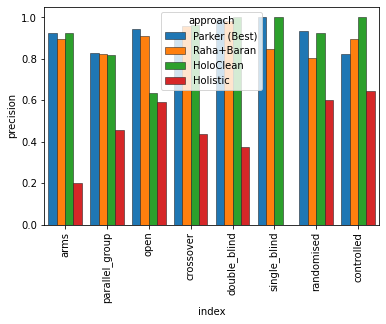

In [76]:
# Precision per attribute
plt.xticks(rotation=90)
ax = sns.barplot(x="index", y="precision", hue="approach", data=df_macro_eudract, order=eudract_error_desc.sort_values("count", ascending=False).index, saturation=1.0, linewidth=.5, edgecolor=".1", dodge=True, hue_order=['Parker (Best)', 'Raha+Baran', 'HoloClean', 'Holistic'])

In [77]:
# Recall per attribute
plt.xticks(rotation=90)
ax = sns.barplot(x="index", y="recall", hue="approach", data=df_macro_eudract, order=eudract_error_desc.sort_values("count", ascending=False).index, saturation=1.0, linewidth=.5, edgecolor=".1", dodge=True, hue_order=['Parker (Best)', 'Raha+Baran', 'HoloClean', 'Holistic'])

### Flight: Effectiveness per Attribute

In [78]:
# Preparation of the dataframes for plotting
df5 = pd.DataFrame(df_parker_macro_flight['metrics']).transpose()[['precision', 'recall']]
df5.reset_index(level=0, inplace=True)
df5['approach'] = 'Parker (Best)'

df6 = pd.DataFrame(df_holoclean_macro_flight['metrics']).transpose()[['precision', 'recall']]
df6.reset_index(level=0, inplace=True)
df6['approach'] = 'HoloClean'

df7 = pd.DataFrame(df_holistic_macro_flight['metrics']).transpose()[['precision', 'recall']]
df7.reset_index(level=0, inplace=True)
df7['approach'] = 'Holistic'

df_macro_flight = pd.concat([df5, df6, df7])
df_macro_flight

index  precision    recall       approach
0     actual_departure   0.624555  0.581691  Parker (Best)
1    scheduled_arrival   0.977199  0.969795  Parker (Best)
2       actual_arrival   0.799281  0.855949  Parker (Best)
3  scheduled_departure   0.990957  0.987149  Parker (Best)
0     actual_departure   0.337900  0.090953      HoloClean
1    scheduled_arrival   0.985221  0.758766      HoloClean
2       actual_arrival   0.617062  0.249051      HoloClean
3  scheduled_departure   0.996824  0.978226      HoloClean
0     actual_departure   0.008627  0.003578       Holistic
1    scheduled_arrival   0.007317  0.006048       Holistic
2       actual_arrival   0.035289  0.019416       Holistic
3  scheduled_departure   0.000538  0.000555       Holistic

In [79]:
# Precision per attribute
plt.xticks(rotation=90)
ax = sns.barplot(x="index", y="precision", hue="approach", data=df_macro_flight, order=flight_error_desc.sort_values("count", ascending=False).index, saturation=1.0, linewidth=.5, edgecolor=".1", dodge=True, hue_order=['Parker (Best)', 'HoloClean', 'Holistic'])

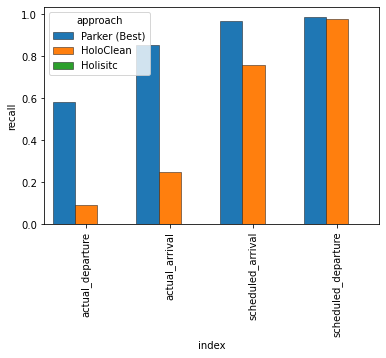

In [80]:
# Recall per attribute
plt.xticks(rotation=90)
ax = sns.barplot(x="index", y="recall", hue="approach", data=df_macro_flight, order=flight_error_desc.sort_values("count", ascending=False).index, saturation=1.0, linewidth=.5, edgecolor=".1", dodge=True, hue_order=['Parker (Best)', 'HoloClean', 'Holisitc'])

### Allergen: Effectiveness per Attribute

In [81]:
# Preparation of the dataframes for plotting
df8 = pd.DataFrame(df_parker_macro_allergen['metrics']).transpose()[['precision', 'recall']]
df8.reset_index(level=0, inplace=True)
df8['approach'] = 'Parker (Best)'

df9 = pd.DataFrame(df_holoclean_macro_allergen['metrics']).transpose()[['precision', 'recall']]
df9.reset_index(level=0, inplace=True)
df9['approach'] = 'HoloClean'

df10 = pd.DataFrame(baran_macro_metrics_allergen['metrics']).transpose()[['precision', 'recall']]
df10.reset_index(level=0, inplace=True)
df10['approach'] = 'Raha+Baran'

df11 = pd.DataFrame(df_holistic_macro_allergen['metrics']).transpose()[['precision', 'recall']]
df11.reset_index(level=0, inplace=True)
df11['approach'] = 'Holistic'

df_macro_allergen = pd.concat([df8, df9, df11, df10])
df_macro_allergen

index  precision    recall       approach
0   almondnuts   1.000000  0.012048  Parker (Best)
1       cashew        NaN  0.000000  Parker (Best)
2         fish        NaN       NaN  Parker (Best)
3         nuts   0.821429  0.560976  Parker (Best)
4       gluten   0.760000  0.678571  Parker (Best)
..         ...        ...       ...            ...
16      peanut   0.783889  0.449419     Raha+Baran
17     sulfite        NaN       NaN     Raha+Baran
18    hazelnut   0.828571  0.132629     Raha+Baran
19    molluscs        NaN       NaN     Raha+Baran
20        milk   0.535412  0.546268     Raha+Baran

[84 rows x 4 columns]

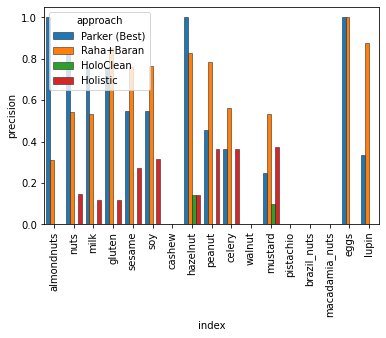

In [82]:
# Precision per attribute
plt.xticks(rotation=90)
ax = sns.barplot(x="index", y="precision", hue="approach", data=df_macro_allergen, order=allergen_error_desc.sort_values("count", ascending=False).index, saturation=1.0, linewidth=.5, edgecolor=".1", dodge=True, hue_order=['Parker (Best)', 'Raha+Baran', 'HoloClean', 'Holistic'])